In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
path = 'runs/' # use your path

In [2]:
import glob
checkpoints_path = "checkpoints/"

In [3]:
def merge_dataframes(file_path):
    all_files = glob.glob(file_path)
    li = []
    step=0
    for filename in all_files:
        df = pd.read_csv(filename, header=0)
        df['Step']=range(step, step+len(df))
        li.append(df)
        step+=len(df)
    return pd.concat(li, axis=0, ignore_index=True)

In [4]:
df_discr=merge_dataframes(path + "Loss_discriminator_*.csv")
df_gen=merge_dataframes(path + "Loss_generator_*.csv")


In [5]:
def plot_results(data, title, color=None):
    print(title)
    plt.figure(figsize=(7,5))
    plt.grid()
    sns.lineplot(x=data["Step"], y=data["Value"], estimator=None, color=color)
    plt.ylabel("Loss")
    #plt.xticks(np.arange(0, data["Step"].max(),10))
    #plt.yticks(np.ceil(np.arange(data["Value"].min(),data["Value"].max(),15)))
    print("Min loss: ", data["Value"].min(), "Max loss: ", data["Value"].max())
    plt.show()

Discriminator Loss
Min loss:  -108.48577117919922 Max loss:  -4.261119842529297


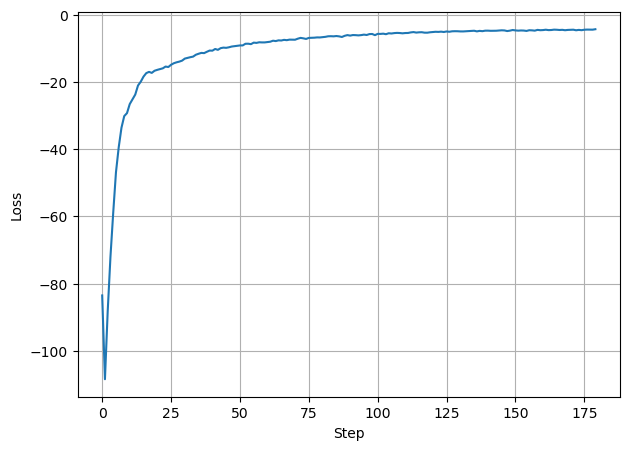

In [6]:
plot_results(df_discr, "Discriminator Loss")

Generator Loss
Min loss:  72.26728057861328 Max loss:  223.68165588378903


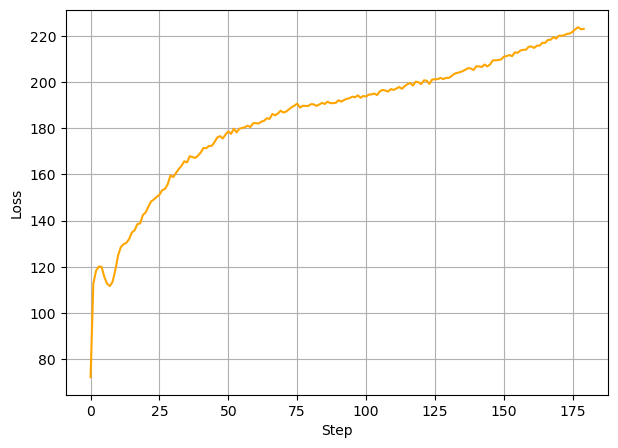

In [7]:
plot_results(df_gen, "Generator Loss", "orange")